# Sample Run of Our Project

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import pickle

In [2]:
!pip install dirty_cat

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

mae_scorer = make_scorer(mean_absolute_error)

In [11]:
combined_data_cleaned = pickle.load(open("./Data/data.pkl", "rb"))

In [15]:
combined_data_cleaned

,title,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,...,game_engines 119,game_engines 341,game_engines 84,game_engines 279,game_engines 8,game_engines 63,game_engines 31,game_engines 135,game_engines 48,game_engines 319
0,WarioWare: Smooth Moves,Nintendo,Intelligent Systems,8.1,8.2,0.0,0,0.0,9,1113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,World of Warcraft: The Burning Crusade,Blizzard Entertainment,Blizzard Entertainment,0.0,9.2,0.0,2,0.0,10,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dragon Shadow Spell,Flight-Plan,Flight-Plan,0.0,0.0,0.0,0,0.0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hotel Dusk: Room 215,Nintendo,Cing,0.0,8.0,6.9,0,0.0,10,5345.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Europa Universalis III,Paradox Interactive,Paradox Interactive,0.0,0.0,0.0,0,0.0,8,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,Monark,FuRyu Corporation,Lancarse,0.0,0.0,0.0,0,0.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2429,Elden Ring,Bandai Namco Entertainment,From Software,0.0,0.0,0.0,0,0.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2430,Triangle Strategy,Nintendo,Square Enix,7.5,0.0,0.0,0,0.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2431,Core Keeper,Fireshine Games,Pugstorm Game Studios,0.0,0.0,0.0,0,4.0,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Transforming Data

In [16]:
X = combined_data_cleaned.drop(['log2'], axis=1)
y = combined_data_cleaned['log2']

In [17]:
from dirty_cat import SuperVectorizer
sup_vec = SuperVectorizer(auto_cast=True)

In [18]:
X_enc = sup_vec.fit_transform(X, y)

In [19]:
from sklearn.model_selection import train_test_split
X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.25, random_state=42
)

## Importing Model 1 (Base line model)

In [23]:
GB_regr = pickle.load(open("./Data/GB_regr.pkl", "rb"))

C:\Users\jemer\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\jemer\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DummyRegressor from version 1.0.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\jemer\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 1.0.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Testing Model 1 Performance

In [22]:
test_predictions = GB_regr.predict(X_test_enc).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])

AttributeError: 'DecisionTreeRegressor' object has no attribute 'n_features_'

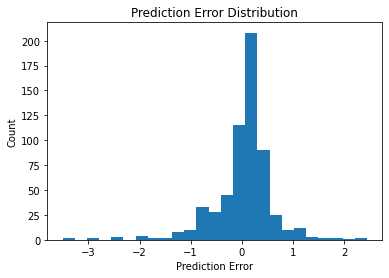

In [12]:
plt.hist(test_predictions - y_test, bins=25)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

In [13]:
np.mean(cross_val_score(GB_regr, X_enc, y, scoring = mae_scorer, cv=4))

0.3900232264619339

## Extracing Feature Importance for Model 1

In [14]:
importances = GB_regr.feature_importances_
indices = np.argsort(importances)
feature_names = sup_vec.get_feature_names()
feature_names[:8]
indices = list(reversed(indices))

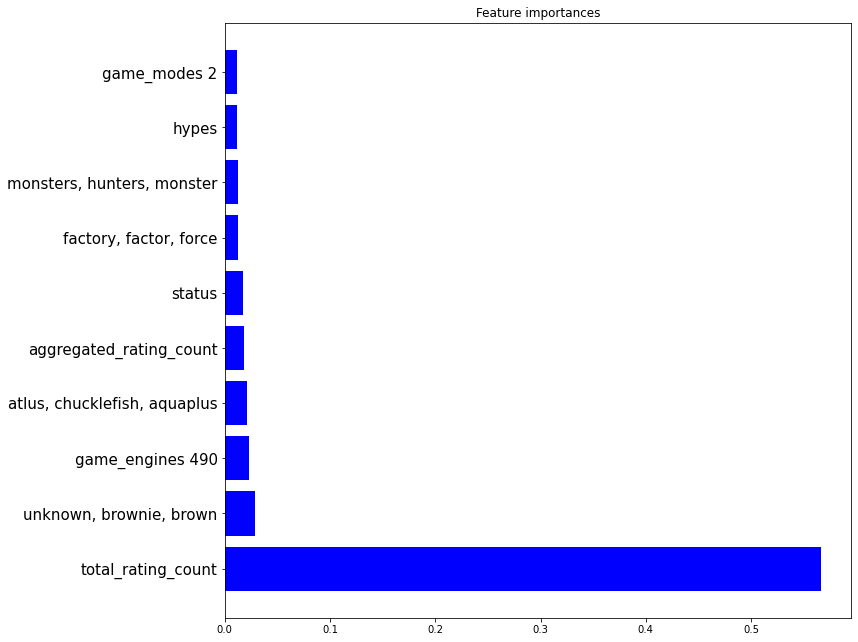

In [15]:
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 10
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b")
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()

## Reddit Data Importing and Cleansing

In [16]:
reddit_data = pd.read_csv("./Data/reddit_comments_sample_2.csv", encoding="ISO-8859-1")[['game_name', 'body']]
reddit_data = reddit_data.dropna()
reddit_data

,game_name,body
0,Minecraft,"In a way, I'm happy people still give them awa..."
1,Minecraft,"she was made by those who mine, and the miners..."
2,Minecraft,"I've also seen Armin, Tiesto, Cosmic Gate, Bla..."
3,Minecraft,\n[Done!](http://getsatisfaction.com/mojang/to...
4,Minecraft,Yes I do the exact same thing. Heres my [hole]...
...,...,...
7440,Let It Die,It's up! Downloading now.
7441,Let It Die,"It's up now, downloading it!"
7442,Let It Die,Let It Die is now available on the NA PlayStat...
7443,Let It Die,Still not available in The Netherlands (Europe)


In [17]:
def get_comments(data, name_col, token_col):
  comments = dict()
  for index, row in data.iterrows():
    name = row[name_col]
    if name not in comments.keys():
      comments[name] = []
    s = row[token_col]
    if s != "[deleted]" and "http" not in s:
      comments[name].append(str(s))
  return comments

reddit_comments = get_comments(reddit_data, "game_name", "body")

In [18]:
reddit_comments["Minecraft"][:10]

["In a way, I'm happy people still give them away. There's still some innocence when jerkoffs like this guy exist.",
 'she was made by those who mine, and the miners keep her!',
 "I've also seen Armin, Tiesto, Cosmic Gate, Blank and jones, Ferry Corsten(three times), Freddie le Grande, Deadmau5, Filo and Pero, and a few more. &lt;3",
 "I think it has a lot to do with the fact that I play on Hard.  If I die and I have to walk for 8 in-game days to my project, well - let's just say I won't be finding my diamond picks.\n\nMovable spawn points at a high cost would fix this, I think.  Since either way, we're playing close to our spawn points, might as well let us explore a bit.\n\nAnd nether, minecarts, and boats just aren't enough to relieve this pressure.",
 'Yes, so stop posting codes in plaintext!\n\nWhy on Earth people want to gift extra licenses to cheaters and trolls is beyond me.  Do something creative to gift randomly, or gift to people who are deserving and skint!',
 'At this poin

## Building Word2Vec Model using Word Tokens from Reddit Data

In [19]:
!pip install gensim

In [20]:
!pip install --upgrade gensim

In [21]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

import nltk
import gensim
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [22]:
def tokenize(tweet):
  tweet = tweet.lower()
  tokens = tokenizer.tokenize(tweet)
  tokens = filter(lambda t: t.isalpha(), tokens)
  tokens = filter(lambda t: not t.startswith('http'), tokens)
  tokens = filter(lambda t: len(t) > 1, tokens)
  return list(tokens)

In [23]:
reddit_data['tokenized'] = reddit_data['body'].progress_map(tokenize)
reddit_data

progress-bar: 100%|██████████| 7445/7445 [00:00<00:00, 9742.57it/s] 


,game_name,body,tokenized
0,Minecraft,"In a way, I'm happy people still give them awa...","[in, way, happy, people, still, give, them, aw..."
1,Minecraft,"she was made by those who mine, and the miners...","[she, was, made, by, those, who, mine, and, th..."
2,Minecraft,"I've also seen Armin, Tiesto, Cosmic Gate, Bla...","[also, seen, armin, tiesto, cosmic, gate, blan..."
3,Minecraft,\n[Done!](http://getsatisfaction.com/mojang/to...,[done]
4,Minecraft,Yes I do the exact same thing. Heres my [hole]...,"[yes, do, the, exact, same, thing, heres, my, ..."
...,...,...,...
7440,Let It Die,It's up! Downloading now.,"[up, downloading, now]"
7441,Let It Die,"It's up now, downloading it!","[up, now, downloading, it]"
7442,Let It Die,Let It Die is now available on the NA PlayStat...,"[let, it, die, is, now, available, on, the, na..."
7443,Let It Die,Still not available in The Netherlands (Europe),"[still, not, available, in, the, netherlands, ..."


In [24]:
TaggedDocument = gensim.models.doc2vec.TaggedDocument
X = np.array(reddit_data.tokenized)

In [25]:
redd_w2v = Word2Vec(vector_size=100, min_count=1)
redd_w2v.build_vocab([x for x in tqdm(X)])
redd_w2v.train([x for x in tqdm(X)], total_examples=redd_w2v.corpus_count, epochs=redd_w2v.epochs)

100%|██████████| 7445/7445 [00:00<00:00, 7441990.77it/s]


(743285, 954095)

In [26]:
redd_w2v.wv.most_similar('good')

[('great', 0.9988512992858887),
 ('amazing', 0.9986017942428589),
 ('awesome', 0.9983112812042236),
 ('nice', 0.9982173442840576),
 ('interesting', 0.9981061816215515),
 ('too', 0.9980556964874268),
 ('fun', 0.9975377917289734),
 ('definitely', 0.9975261092185974),
 ('though', 0.997437059879303),
 ('fine', 0.9974284172058105)]

In [27]:
def get_tokenized_comments(data, name_col, token_col):
  comments = dict()
  for index, row in data.iterrows():
    name = row[name_col]
    if name not in comments.keys():
      comments[name] = []
    for s in row[token_col]:
      if s.isalpha() and len(s) > 2:
        comments[name].append(s)
  return comments

tokenized_reddit_comments = get_tokenized_comments(reddit_data, "game_name", "tokenized")

In [28]:
names = np.unique(reddit_data["game_name"])
for name in names[:5]:
  print(name, tokenized_reddit_comments[name])

60 Seconds! ['deleted', 'test', 'test', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragra

In [29]:
w2v = []
game_names = []
for game, comments in tokenized_reddit_comments.items():
  w2v_temp = []
  for c in comments:
    v = redd_w2v.wv[c]
    w2v_temp.append(v)
  w2v_temp = np.array(w2v_temp)
  w2v.append(np.mean(w2v_temp, axis=0))
  game_names.append(game)


In [30]:
w2v = np.array(w2v)
w2v_df = pd.DataFrame(w2v)
w2v_df['title'] = np.array(game_names)

In [31]:
!pip install vaderSentiment

## Sentiment Analysis

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [33]:
sid_obj = SentimentIntensityAnalyzer()
pos = []
neu = []
neg = []
game_names = []

for game, comments in reddit_comments.items():
  pos_temp = []
  neu_temp = []
  neg_temp = []
  for c in comments:
    sentiment_dict = sid_obj.polarity_scores(c)
    pos_temp.append(sentiment_dict['pos'])
    neu_temp.append(sentiment_dict['neu'])
    neg_temp.append(sentiment_dict['neg'])
  pos.append(np.mean(pos_temp))
  neu.append(np.mean(neu_temp))
  neg.append(np.mean(neg_temp))
  game_names.append(game)

In [34]:
senti_df = pd.DataFrame()
senti_df['pos'] = pos
senti_df['neu'] = neu
senti_df['neg'] = neg
senti_df['title'] = game_names

In [35]:
senti_df

,pos,neu,neg,title
0,0.158786,0.791071,0.050357,Minecraft
1,0.106813,0.743000,0.150188,Grand Theft Auto V
2,0.211105,0.708526,0.080474,Mario Kart 8 Deluxe
3,0.165647,0.798941,0.035412,Red Dead Redemption 2
4,0.176000,0.806300,0.017650,Animal Crossing: New Horizons
...,...,...,...,...
369,0.223400,0.658800,0.118100,Maitetsu: Pure Station
370,0.113235,0.825118,0.061588,Million Arthur: Arcana Blood
371,0.146550,0.750700,0.102650,Billion Road
372,0.226350,0.748650,0.025000,Gungrave VR


In [36]:
senti_df.set_index('title')

,pos,neu,neg
title,,,
Minecraft,0.158786,0.791071,0.050357
Grand Theft Auto V,0.106813,0.743000,0.150188
Mario Kart 8 Deluxe,0.211105,0.708526,0.080474
Red Dead Redemption 2,0.165647,0.798941,0.035412
Animal Crossing: New Horizons,0.176000,0.806300,0.017650
...,...,...,...
Maitetsu: Pure Station,0.223400,0.658800,0.118100
Million Arthur: Arcana Blood,0.113235,0.825118,0.061588
Billion Road,0.146550,0.750700,0.102650


## Joining All Data into One Table

In [37]:
rslt_df = combined_data_cleaned.set_index('title').join(senti_df.set_index('title'), how='inner')
rslt_df = rslt_df.join(w2v_df.set_index('title'), how='inner')
rslt_df = rslt_df.reset_index().drop(['title'], axis=1)

In [38]:
sup_vec = SuperVectorizer(auto_cast=True)

In [39]:
X = rslt_df.drop(['log2'], axis=1)
y = rslt_df['log2']
X_enc = sup_vec.fit_transform(X, y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.25
)

## Trainning Model 2

In [41]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

## Testing Model 2 Performance

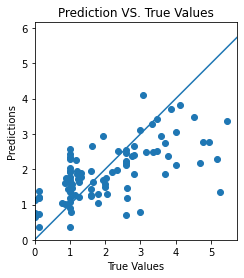

In [42]:
test_predictions = regressor.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])

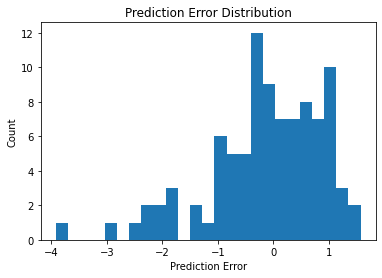

In [43]:
plt.hist(test_predictions - y_test, bins=25)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

In [44]:
np.mean(cross_val_score(regressor, X_enc, y, scoring = mae_scorer, cv=4))

0.7820786671152874

## Extracing Feature Importance for Model 2

In [45]:
importances = regressor.feature_importances_
indices = np.argsort(importances)
feature_names = sup_vec.get_feature_names()
feature_names[:8]
indices = list(reversed(indices))

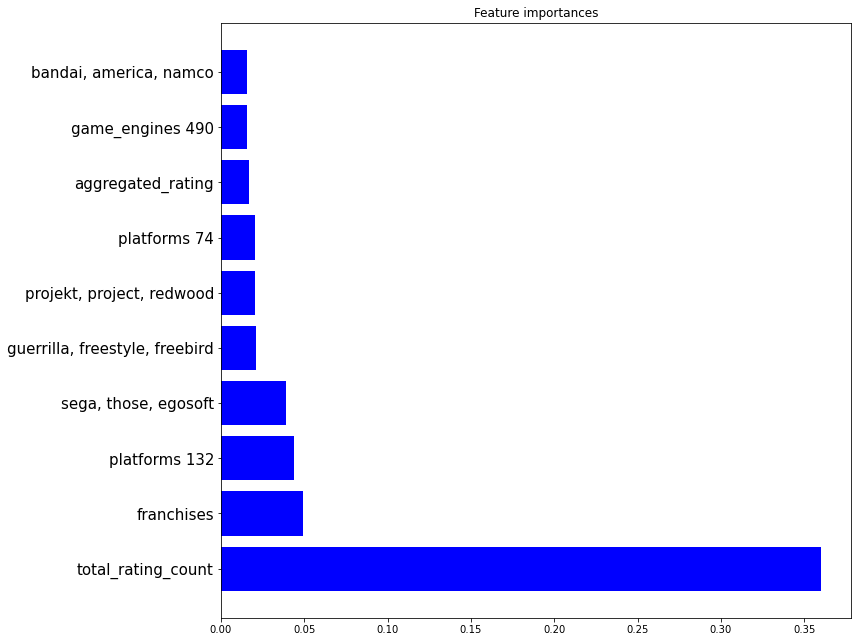

In [46]:
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 10
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b")
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()